In [129]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
# 设置绘图风格和字体
plt.figure(dpi=120, figsize=(6, 4))
sns.set_theme(style="white", font_scale=0.8)
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif']=['SimHei'] # 中文支持
plt.rcParams['axes.unicode_minus']=False

<Figure size 720x480 with 0 Axes>

In [130]:
df=pd.read_excel('项目与金牌合并数据.xlsx')
df

,Rank,NOC,Gold,Silver,Bronze,Total,Year,year,Artistic Swimming,Diving,...,Beach,Indoor.1,Water Motorsports,Weightlifting,Freestyle,Greco-Roman,Total events,Total disciplines,Total sports,Total_Sports_Events
0,1,United States,11,7,2,20,1896,1896,0,0,...,0,0,0,2,0,1,43,10,11,43
1,2,Greece,10,18,19,47,1896,1896,0,0,...,0,0,0,2,0,1,43,10,11,43
2,3,Germany,6,5,2,13,1896,1896,0,0,...,0,0,0,2,0,1,43,10,11,43
3,4,France,5,4,2,11,1896,1896,0,0,...,0,0,0,2,0,1,43,10,11,43
4,5,Great Britain,2,3,2,7,1896,1896,0,0,...,0,0,0,2,0,1,43,10,11,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1443,85,Mixed team,0,0,0,0,2024,2024,2,8,...,2,2,0,10,12,6,329,48,32,329
1444,85,United Team of Germany,0,0,0,0,2024,2024,2,8,...,2,2,0,10,12,6,329,48,32,329
1445,85,Ceylon,0,0,0,0,2024,2024,2,8,...,2,2,0,10,12,6,329,48,32,329
1446,85,FR Yugoslavia,0,0,0,0,2024,2024,2,8,...,2,2,0,10,12,6,329,48,32,329


In [131]:
df['NOC']=df['NOC'].apply(lambda x:x.replace('\xa0',''))

In [132]:
df['Year'].unique()

array([1896, 1900, 1904, 1908, 1912, 1920, 1924, 1928, 1932, 1936, 1948,
       1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992,
       1996, 2000, 2004, 2008, 2012, 2016, 2020, 2024])

In [133]:
df['NOC'].unique()

array(['United States', 'Greece', 'Germany', 'France', 'Great Britain',
       'Hungary', 'Austria', 'Australia', 'Denmark', 'Switzerland',
       'Mixed team', 'Belgium', 'Italy', 'Cuba', 'Canada', 'Spain',
       'Luxembourg', 'Norway', 'Netherlands', 'India', 'Bohemia',
       'Sweden', 'Australasia', 'Russian Empire', 'Finland',
       'South Africa', 'Estonia', 'Brazil', 'Japan', 'Czechoslovakia',
       'New Zealand', 'Yugoslavia', 'Argentina', 'Uruguay', 'Poland',
       'Haiti', 'Portugal', 'Romania', 'Egypt', 'Ireland', 'Chile',
       'Philippines', 'United States?', 'Italy?', 'France?', 'Sweden?',
       'Japan?', 'Hungary?', 'Germany?', 'Finland?', 'Great Britain?',
       'Poland?', 'Australia?', 'Argentina?', 'Canada?', 'Netherlands?',
       'South Africa?', 'Ireland?', 'Czechoslovakia?', 'Austria?',
       'India?', 'Denmark?', 'Mexico?', 'Latvia?', 'New Zealand?',
       'Switzerland?', 'Philippines?', 'Belgium?', 'Spain?', 'Uruguay?',
       'Turkey', 'Latvia', 'Mexic

In [134]:
# 以国家名称为主，结合主办年份的字典：
olympic_hosts = {
    1896: "Greece",
    1900: "France",
    1904: "United States",
    1908: "Great Britain",
    1912: "Sweden",
    1920: "Belgium",
    1924: "France",
    1928: "Netherlands",
    1932: "United States",
    1936: "Germany",
    1948: "Great Britain",
    1952: "Finland",
    1956: "Australia",
    1960: "Italy",
    1964: "Japan",
    1968: "Mexico",
    1972: "Germany",
    1976: "Canada",
    1980: "Soviet Union",
    1984: "United States",
    1988: "South Korea",
    1992: "Spain",
    1996: "United States",
    2000: "Australia",
    2004: "Greece",
    2008: "China",
    2012: "Great Britain",
    2016: "Brazil",
    2020: "Japan",
    2024: "France"
}


In [135]:
# 添加主办国标识列
df['Host_Country'] = df.apply(
    lambda row: 1 if olympic_hosts.get(row['Year']) == row['NOC'] else 0,
    axis=1
)

In [136]:
summerOly_athletes = pd.read_csv('data/summerOly_athletes.csv')
summerOly_athletes

,Name,Sex,Team,NOC,Year,City,Sport,Event,Medal
0,A Dijiang,M,China,CHN,1992,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,A Lamusi,M,China,CHN,2012,London,Judo,Judo Men's Extra-Lightweight,No medal
2,Gunnar Aaby,M,Denmark,DEN,1920,Antwerpen,Football,Football Men's Football,No medal
3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Cornelia (-strannood),F,Netherlands,NED,1932,Los Angeles,Athletics,Athletics Women's 100 metres,No medal
...,...,...,...,...,...,...,...,...,...
252560,Sefora Ada,F,Equatorial Guinea,GEQ,2024,Paris,Athletics,Women's 100m,No medal
252561,Emanuela Liuzzi,F,Italy,ITA,2024,Paris,Wrestling,Women's Freestyle 50kg,No medal
252562,Isayah Boers,M,Netherlands,NED,2024,Paris,Athletics,4 x 400m Relay Mixed,Gold
252563,Kevin Staut,M,France,FRA,2024,Paris,Equestrian,Jumping Team,Bronze


In [137]:
summerOly_athletes['Sport'].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics', 'Cycling Road', 'Artistic Gymnastics',
       'Karate', 'Baseball/Softball', 'Trampoline Gymnastics',
       'Marathon Swimming', 'Canoe Slalom', 'Surfing', 'Canoe Sprint',
       'Cycling BMX Racing', 'Equestrian', 

In [138]:
# 获取所有独特的运动项目
sports = summerOly_athletes['Sport'].unique()

# 创建一个新的DataFrame用于统计每年、每个国家在各个运动的获奖数量
awards_summary = (
    summerOly_athletes[summerOly_athletes['Medal'] != 'No medal']  # 排除未获奖牌的数据
    .groupby(['Year', 'Team', 'Sport'])
    .size()
    .unstack(fill_value=0)  # 将运动项目展开为列
    .reindex(columns=sports, fill_value=0)  # 确保所有运动项目都在列中
    .reset_index()
)

In [139]:
# 将列名的第3列（索引2）及之后的列名添加 "NM_" 前缀
awards_summary.columns = list(awards_summary.columns[:2]) + ["NM_" + col for col in awards_summary.columns[2:]]

In [140]:
awards_summary

,Year,Team,NM_Basketball,NM_Judo,NM_Football,NM_Tug-Of-War,NM_Athletics,NM_Swimming,NM_Badminton,NM_Sailing,...,NM_Cycling Mountain Bike,NM_3x3 Basketball,NM_Cycling BMX Freestyle,NM_Sport Climbing,"NM_Marathon Swimming, Swimming",NM_Breaking,"NM_Cycling Road, Cycling Track","NM_Cycling Road, Cycling Mountain Bike","NM_Cycling Road, Triathlon","NM_3x3 Basketball, Basketball"
0,1896,Australia,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1896,Australia/Great Britain,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1896,Austria,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1896,Denmark,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1896,Ethnikos Gymnastikos Syllogos,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1863,2024,Uganda,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1864,2024,Ukraine,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1865,2024,United States,24,0,20,0,58,69,0,2,...,1,4,1,2,0,1,0,0,0,0
1866,2024,Uzbekistan,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [141]:
df['合并键']=df['Year'].map(str)+'_'+df['NOC']
awards_summary['合并键']=awards_summary['Year'].map(str)+'_'+awards_summary['Team']

In [142]:
df=df.merge(awards_summary, on='合并键', how='left')

In [143]:
difference = set(df['NOC'].unique()) - set(awards_summary['Team'].unique())
difference

{'Argentina?',
 'Australia?',
 'Austria?',
 'Belgium?',
 'Brazil?',
 'British West Indies',
 'British West Indies?',
 'Bulgaria?',
 'Canada?',
 'Ceylon',
 'Czechoslovakia?',
 'Denmark?',
 'Egypt?',
 'Ethiopia?',
 'FR Yugoslavia',
 'Finland?',
 'Formosa?',
 'France?',
 'Germany?',
 'Ghana?',
 'Great Britain?',
 'Greece?',
 'Hungary?',
 'Independent Olympic Athletes',
 'Independent Olympic Participants',
 'India?',
 'Iran?',
 'Iraq?',
 'Ireland?',
 'Italy?',
 'Japan?',
 'Latvia?',
 'Mexico?',
 'Mixed team',
 'Morocco?',
 'Netherlands?',
 'New Zealand?',
 'Norway?',
 'Pakistan?',
 'Philippines?',
 'Poland?',
 'Portugal?',
 'ROC',
 'Refugee Olympic Team',
 'Romania?',
 'Russian Empire',
 'Samoa',
 'Singapore?',
 'South Africa?',
 'Soviet Union?',
 'Spain?',
 'Sweden?',
 'Switzerland?',
 'Taiwan',
 'Turkey?',
 'United States?',
 'United Team of Germany',
 'United Team of Germany?',
 'Uruguay?',
 'Venezuela?',
 'Virgin Islands',
 'Yugoslavia?'}

In [144]:
df.columns

Index(['Rank', 'NOC', 'Gold', 'Silver', 'Bronze', 'Total', 'Year_x', 'year',
       'Artistic Swimming', 'Diving',
       ...
       'NM_Cycling Mountain Bike', 'NM_3x3 Basketball',
       'NM_Cycling BMX Freestyle', 'NM_Sport Climbing',
       'NM_Marathon Swimming, Swimming', 'NM_Breaking',
       'NM_Cycling Road, Cycling Track',
       'NM_Cycling Road, Cycling Mountain Bike', 'NM_Cycling Road, Triathlon',
       'NM_3x3 Basketball, Basketball'],
      dtype='object', length=161)

In [145]:
del df['Year_x']

In [146]:
del df['合并键']
del df['Year_y']

In [147]:

del df['Team']


In [148]:
df

,Rank,NOC,Gold,Silver,Bronze,Total,year,Artistic Swimming,Diving,Marathon Swimming,...,NM_Cycling Mountain Bike,NM_3x3 Basketball,NM_Cycling BMX Freestyle,NM_Sport Climbing,"NM_Marathon Swimming, Swimming",NM_Breaking,"NM_Cycling Road, Cycling Track","NM_Cycling Road, Cycling Mountain Bike","NM_Cycling Road, Triathlon","NM_3x3 Basketball, Basketball"
0,1,United States,11,7,2,20,1896,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Greece,10,18,19,47,1896,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Germany,6,5,2,13,1896,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,France,5,4,2,11,1896,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Great Britain,2,3,2,7,1896,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1443,85,Mixed team,0,0,0,0,2024,2,8,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1444,85,United Team of Germany,0,0,0,0,2024,2,8,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1445,85,Ceylon,0,0,0,0,2024,2,8,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1446,85,FR Yugoslavia,0,0,0,0,2024,2,8,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [149]:
df.fillna(0,inplace=True)

In [150]:
df.to_csv('Q1_2数据汇总.csv',index=None)

In [151]:
# 将 merged_data 中的 'NOC' 列转换为数值
# 使用 Label Encoding 将字符串编码为数值
from sklearn.preprocessing import LabelEncoder

# 创建 LabelEncoder 实例
label_encoder = LabelEncoder()

# 对 'NOC' 列进行编码
df['NOC'] = label_encoder.fit_transform(df['NOC'])

In [152]:
label_encoder.inverse_transform (df['NOC'])

array(['United States', 'Greece', 'Germany', ..., 'Ceylon',
       'FR Yugoslavia', 'ROC'], dtype=object)

In [104]:
df.columns[6:]

Index(['year', 'Artistic Swimming', 'Diving', 'Marathon Swimming', 'Swimming',
       'Water Polo', 'Archery', 'Athletics', 'Badminton', 'Baseball',
       ...
       'NM_Cycling Mountain Bike', 'NM_3x3 Basketball',
       'NM_Cycling BMX Freestyle', 'NM_Sport Climbing',
       'NM_Marathon Swimming, Swimming', 'NM_Breaking',
       'NM_Cycling Road, Cycling Track',
       'NM_Cycling Road, Cycling Mountain Bike', 'NM_Cycling Road, Triathlon',
       'NM_3x3 Basketball, Basketball'],
      dtype='object', length=151)

In [153]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# 定义因变量和自变量
y = df[['Gold', 'Silver', 'Bronze'] ] # 奖牌总数
x_columns = df.columns[7:]

# 自变量和因变量
X = df[x_columns]


In [106]:
df.columns[7:100]

Index(['Artistic Swimming', 'Diving', 'Marathon Swimming', 'Swimming',
       'Water Polo', 'Archery', 'Athletics', 'Badminton', 'Baseball',
       'Softball', '3x3', 'Basketball', 'Basque Pelota', 'Boxing', 'Breaking',
       'Sprint', 'Slalom', 'Cricket', 'Croquet', 'BMX Freestyle', 'BMX Racing',
       'Mountain Bike', 'Road', 'Track', 'Dressage', 'Eventing', 'Jumping',
       'Vaulting', 'Driving', 'Fencing', 'Field hockey', 'Flag football',
       'Football', 'Golf', 'Artistic', 'Rhythmic', 'Trampoline', 'Indoor',
       'Field', 'Jeu de Paume', 'Judo', 'Karate', 'Sixes', 'Field.1',
       'Modern Pentathlon', 'Polo', 'Rackets', 'Roque', 'Coastal', 'Rowing',
       'Sevens', 'Union', 'Sailing', 'Shooting', 'Skateboarding',
       'Sport Climbing', 'Squash', 'Surfing', 'Table Tennis', 'Taekwondo',
       'Tennis', 'Triathlon', 'Tug of War', 'Beach', 'Indoor.1',
       'Water Motorsports', 'Weightlifting', 'Freestyle', 'Greco-Roman',
       'Total events', 'Total disciplines', 'Tota

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import warnings
from itertools import combinations
import datetime
from dateutil.relativedelta import relativedelta
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.rcParams["font.sans-serif"]=["SimHei"]
plt.rcParams["axes.unicode_minus"]=False

# 此处所引入的包大部分为下文机器学习算法
import pandas as pd
from numpy import *
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
import lightgbm as lgb
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error,r2_score

import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) 




In [155]:
# # BP神经网络（MLPRegressor）
# from sklearn.neural_network import MLPRegressor
# model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# # 随机森林回归（RandomForestRegressor）
# from sklearn.ensemble import RandomForestRegressor
# model = RandomForestRegressor(random_state=42)

# # 决策树回归（DecisionTreeRegressor）
# from sklearn.tree import DecisionTreeRegressor
# model = DecisionTreeRegressor(random_state=42)

# # 线性回归（LinearRegression）
# from sklearn.linear_model import LinearRegression
# model = LinearRegression()

# # XGBoost回归（XGBRegressor）
# import xgboost as xgb
# model = xgb.XGBRegressor(random_state=42)

# # LightGBM回归（LGBMRegressor）
# import lightgbm as lgb
# model = lgb.LGBMRegressor(random_state=42)


In [156]:
import numpy as np

def calculate_mape(y_true, y_pred):
    """
    计算均值绝对百分比误差（MAPE）

    参数:
    y_true (array-like): 实际值
    y_pred (array-like): 预测值

    返回:
    float: MAPE值，表示预测误差的百分比
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # 防止分母为零，将零值替换为一个非常小的数
    y_true = np.where(y_true == 0, 1e-10, y_true)
    mape = np.mean(np.abs((y_true - y_pred) / y_true))
    return mape

In [157]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 准备数据
y = df['Gold']  # 奖牌总数['Gold', 'Silver', 'Bronze']
X = df[['NOC']+list(df.columns[6:])]  # 输入特征


In [158]:
# 拆分数据集为训练集和测试集，通常设置 test_size=0.2 或 0.3
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [159]:
# # XGBoost回归（XGBRegressor）
import xgboost as xgb
model = xgb.XGBRegressor(random_state=42)

# 训练模型
model.fit(X_train, Y_train)
# 预测测试集

y_pred = model.predict(X_test)
# 计算均方误差 (MSE) 和 R² 值
mape= calculate_mape(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

# 输出评估结果
print(f'mape: {mape}')
print(f'R² Score: {r2}')


mape: 2560995356.4332056
R² Score: 0.8421593904495239


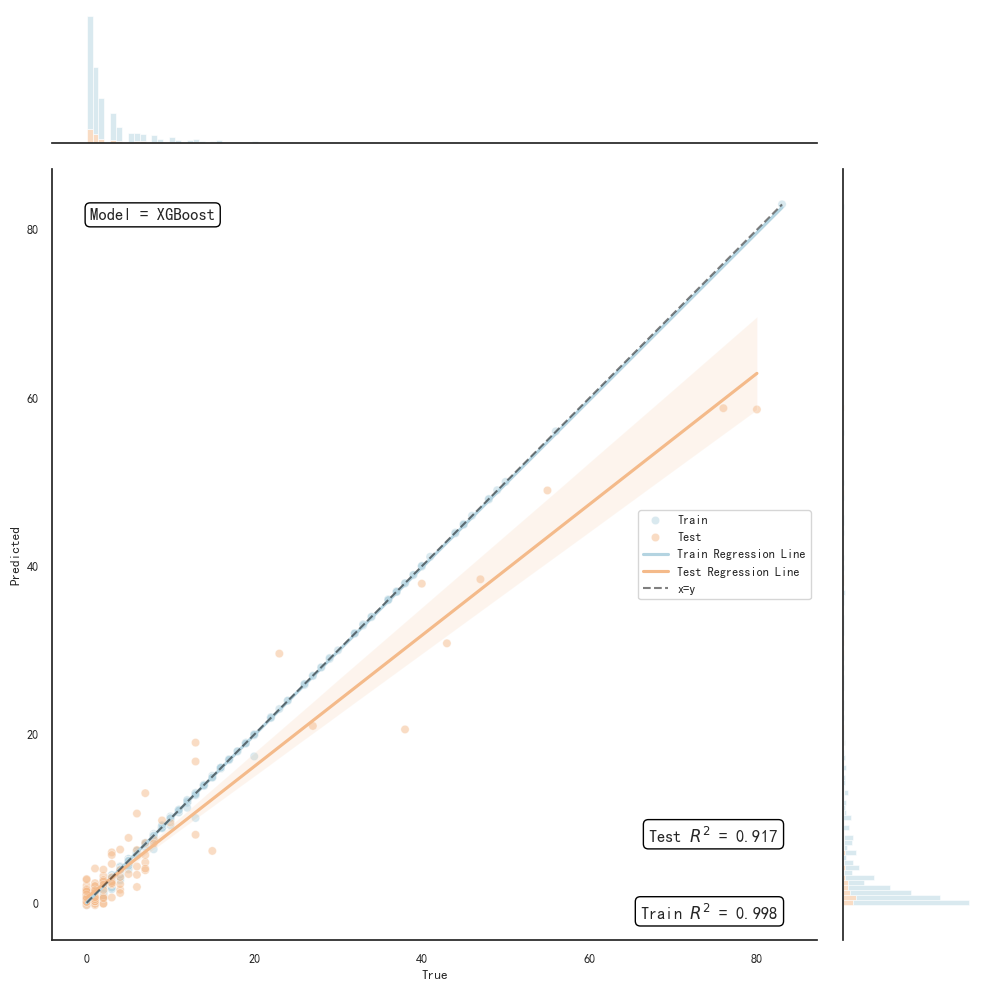

In [398]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import numpy as np

# 定义 MAPE 计算函数
def calculate_mape(y_true, y_pred):
    """
    计算均值绝对百分比误差（MAPE）
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    y_true = np.where(y_true == 0, 1e-10, y_true)  # 防止分母为零
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mape

# 模型训练与预测 (假设已定义 X_train, Y_train, X_test, Y_test 和 model)
model.fit(X_train, Y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# 计算 R² 和 MAPE
r2_train = r2_score(Y_train, y_pred_train)
r2_test = r2_score(Y_test, y_pred_test)
mape_train = calculate_mape(Y_train, y_pred_train)
mape_test = calculate_mape(Y_test, y_pred_test)

# 创建包含训练集和测试集真实值与预测值的数据框
data_train = pd.DataFrame({
    'True': Y_train,
    'Predicted': y_pred_train,
    'Data Set': 'Train'
})

data_test = pd.DataFrame({
    'True': Y_test,
    'Predicted': y_pred_test,
    'Data Set': 'Test'
})

data = pd.concat([data_train, data_test])

# 自定义调色板
palette = {'Train': '#b4d4e1', 'Test': '#f4ba8a'}

# 创建 JointGrid 对象
g = sns.JointGrid(data=data, x="True", y="Predicted", hue="Data Set", height=10, palette=palette)

# 绘制中心的散点图
g.plot_joint(sns.scatterplot, alpha=0.5)

# 添加训练集的回归线
sns.regplot(data=data_train, x="True", y="Predicted", scatter=False, ax=g.ax_joint, color='#b4d4e1', label='Train Regression Line')

# 添加测试集的回归线
sns.regplot(data=data_test, x="True", y="Predicted", scatter=False, ax=g.ax_joint, color='#f4ba8a', label='Test Regression Line')

# 添加边缘的柱状图
g.plot_marginals(sns.histplot, kde=False, element='bars', multiple='stack', alpha=0.5)

# 添加拟合优度和 MAPE 文本在右上角
ax = g.ax_joint
ax.text(0.95, 0.05, f'Train $R^2$ = {r2_train:.3f}', transform=ax.transAxes, fontsize=12,
        verticalalignment='top', horizontalalignment='right', bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

ax.text(0.95, 0.15, f'Test $R^2$ = {r2_test:.3f}', transform=ax.transAxes, fontsize=12,
        verticalalignment='top', horizontalalignment='right', bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))


# 在左上角添加模型名称文本
ax.text(0.05, 0.95, 'Model = XGBoost', transform=ax.transAxes, fontsize=12,
        verticalalignment='top', horizontalalignment='left', bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

# 添加中心线 (x=y)
ax.plot([data['True'].min(), data['True'].max()], [data['True'].min(), data['True'].max()], c="black", alpha=0.5, linestyle='--', label='x=y')
ax.legend()

plt.show()


In [399]:
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
from sklearn.metrics import r2_score, mean_absolute_percentage_error
import xgboost as xgb

# 定义目标函数
def objective(params):
    model = xgb.XGBRegressor(
        n_estimators=int(params['n_estimators']),
        max_depth=int(params['max_depth']),
        learning_rate=params['learning_rate'],
        subsample=params['subsample'],
        colsample_bytree=params['colsample_bytree'],
        random_state=42
    )
    
    # 训练模型
    model.fit(X_train, Y_train)
    
    # 预测并计算R²值
    y_pred = model.predict(X_test)
    r2 = r2_score(Y_test, y_pred)
    
    # 返回负的R²值（因为TPE会最小化目标函数）
    return {'loss': -r2, 'status': STATUS_OK}

# 定义超参数空间
space = {
    'n_estimators': hp.quniform('n_estimators', 100, 1000, 50),
    'max_depth': hp.quniform('max_depth', 3, 12, 1),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.3),
    'subsample': hp.uniform('subsample', 0.5, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1.0)
}

# 使用TPE优化超参数
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50, trials=trials)

# 最优参数
best_params = {
    'n_estimators': int(best['n_estimators']),
    'max_depth': int(best['max_depth']),
    'learning_rate': best['learning_rate'],
    'subsample': best['subsample'],
    'colsample_bytree': best['colsample_bytree']
}

# 使用最优参数重新训练模型
final_model = xgb.XGBRegressor(**best_params, random_state=42)
final_model.fit(X_train, Y_train)

# 预测并评估最终模型
final_y_pred = final_model.predict(X_test)
final_r2 = r2_score(Y_test, final_y_pred)
final_mape = mean_absolute_percentage_error(Y_test, final_y_pred)

# 输出最终评估结果
print(f"Best Parameters: {best_params}")
print(f"Final R² Score: {final_r2}")
print(f"Final MAPE: {final_mape}")


100%|███████████████████████████████████████████████| 50/50 [01:23<00:00,  1.66s/trial, best loss: -0.9501214027404785]
Best Parameters: {'n_estimators': 450, 'max_depth': 8, 'learning_rate': np.float64(0.17836851047933927), 'subsample': np.float64(0.7804161850188138), 'colsample_bytree': np.float64(0.5734073795073531)}
Final R² Score: 0.9501214027404785
Final MAPE: 1226135953619172.0


In [160]:
# # XGBoost回归（XGBRegressor）
import xgboost as xgb
model = xgb.XGBRegressor(** {'n_estimators': 450, 'max_depth': 8, 'learning_rate': np.float64(0.17836851047933927), 'subsample': np.float64(0.7804161850188138), 'colsample_bytree': np.float64(0.5734073795073531)},random_state=42)

# 训练模型
model.fit(X_train, Y_train)
# 预测测试集

y_pred = model.predict(X_test)
# 计算均方误差 (MSE) 和 R² 值
mape= calculate_mape(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

# 输出评估结果
print(f'mape: {mape}')
print(f'R² Score: {r2}')


mape: 2381791216.579012
R² Score: 0.8842165470123291


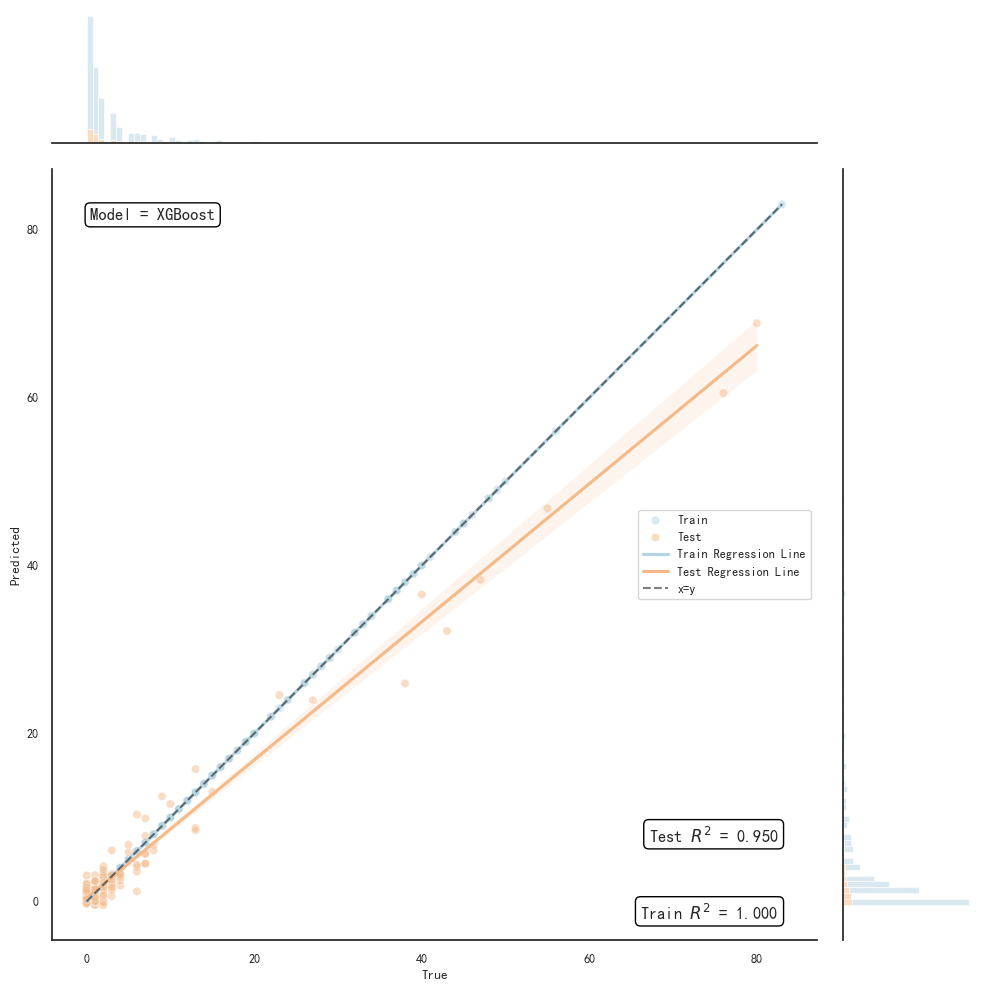

In [404]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import numpy as np

# 定义 MAPE 计算函数
def calculate_mape(y_true, y_pred):
    """
    计算均值绝对百分比误差（MAPE）
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    y_true = np.where(y_true == 0, 1e-10, y_true)  # 防止分母为零
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mape

# 模型训练与预测 (假设已定义 X_train, Y_train, X_test, Y_test 和 model)
model.fit(X_train, Y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# 计算 R² 和 MAPE
r2_train = r2_score(Y_train, y_pred_train)
r2_test = r2_score(Y_test, y_pred_test)
mape_train = calculate_mape(Y_train, y_pred_train)
mape_test = calculate_mape(Y_test, y_pred_test)

# 创建包含训练集和测试集真实值与预测值的数据框
data_train = pd.DataFrame({
    'True': Y_train,
    'Predicted': y_pred_train,
    'Data Set': 'Train'
})

data_test = pd.DataFrame({
    'True': Y_test,
    'Predicted': y_pred_test,
    'Data Set': 'Test'
})

data = pd.concat([data_train, data_test])

# 自定义调色板
palette = {'Train': '#b4d4e1', 'Test': '#f4ba8a'}

# 创建 JointGrid 对象
g = sns.JointGrid(data=data, x="True", y="Predicted", hue="Data Set", height=10, palette=palette)

# 绘制中心的散点图
g.plot_joint(sns.scatterplot, alpha=0.5)

# 添加训练集的回归线
sns.regplot(data=data_train, x="True", y="Predicted", scatter=False, ax=g.ax_joint, color='#b4d4e1', label='Train Regression Line')

# 添加测试集的回归线
sns.regplot(data=data_test, x="True", y="Predicted", scatter=False, ax=g.ax_joint, color='#f4ba8a', label='Test Regression Line')

# 添加边缘的柱状图
g.plot_marginals(sns.histplot, kde=False, element='bars', multiple='stack', alpha=0.5)

# 添加拟合优度和 MAPE 文本在右上角
ax = g.ax_joint
ax.text(0.95, 0.05, f'Train $R^2$ = {r2_train:.3f}', transform=ax.transAxes, fontsize=12,
        verticalalignment='top', horizontalalignment='right', bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

ax.text(0.95, 0.15, f'Test $R^2$ = {r2_test:.3f}', transform=ax.transAxes, fontsize=12,
        verticalalignment='top', horizontalalignment='right', bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))


# 在左上角添加模型名称文本
ax.text(0.05, 0.95, 'Model = XGBoost', transform=ax.transAxes, fontsize=12,
        verticalalignment='top', horizontalalignment='left', bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

# 添加中心线 (x=y)
ax.plot([data['True'].min(), data['True'].max()], [data['True'].min(), data['True'].max()], c="black", alpha=0.5, linestyle='--', label='x=y')
ax.legend()

plt.show()


In [161]:
model_gold = xgb.XGBRegressor(** {'n_estimators': 450, 'max_depth': 8, 'learning_rate': np.float64(0.17836851047933927), 'subsample': np.float64(0.7804161850188138), 'colsample_bytree': np.float64(0.5734073795073531)},random_state=42)

# 训练模型
model_gold.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=np.float64(0.5734073795073531), device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=np.float64(0.17836851047933927), max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=450, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [162]:
# 准备数据
y = df['Silver']  # 奖牌总数['Gold', 'Silver', 'Bronze']
X = df[['NOC']+list(df.columns[6:])]  # 输入特征

# 拆分数据集为训练集和测试集，通常设置 test_size=0.2 或 0.3
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# # XGBoost回归（XGBRegressor）
import xgboost as xgb
model = xgb.XGBRegressor(random_state=42)

# 训练模型
model.fit(X_train, Y_train)
# 预测测试集

y_pred = model.predict(X_test)
# 计算均方误差 (MSE) 和 R² 值
mape= calculate_mape(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

# 输出评估结果
print(f'mape: {mape}')
print(f'R² Score: {r2}')


mape: 1809959089.379622
R² Score: 0.8591164946556091


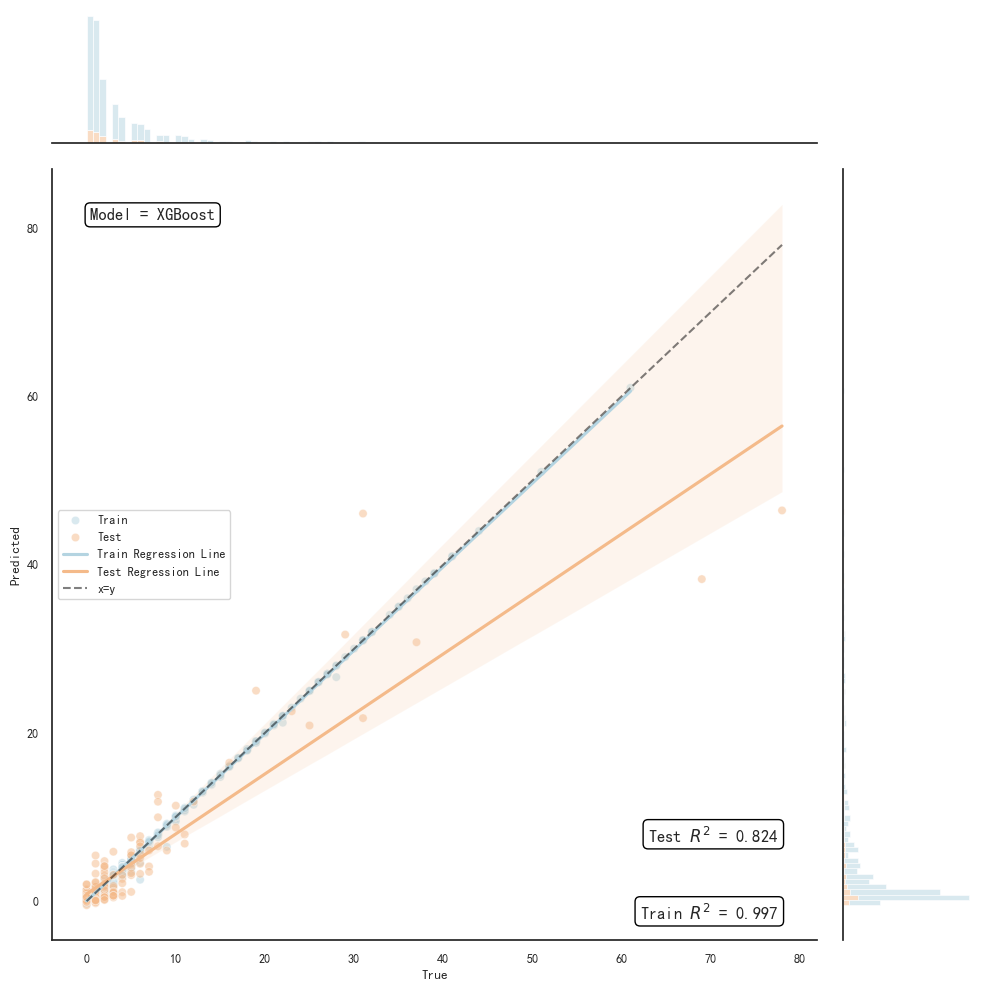

In [407]:

# 模型训练与预测 (假设已定义 X_train, Y_train, X_test, Y_test 和 model)
model.fit(X_train, Y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# 计算 R² 和 MAPE
r2_train = r2_score(Y_train, y_pred_train)
r2_test = r2_score(Y_test, y_pred_test)
mape_train = calculate_mape(Y_train, y_pred_train)
mape_test = calculate_mape(Y_test, y_pred_test)

# 创建包含训练集和测试集真实值与预测值的数据框
data_train = pd.DataFrame({
    'True': Y_train,
    'Predicted': y_pred_train,
    'Data Set': 'Train'
})

data_test = pd.DataFrame({
    'True': Y_test,
    'Predicted': y_pred_test,
    'Data Set': 'Test'
})

data = pd.concat([data_train, data_test])

# 自定义调色板
palette = {'Train': '#b4d4e1', 'Test': '#f4ba8a'}

# 创建 JointGrid 对象
g = sns.JointGrid(data=data, x="True", y="Predicted", hue="Data Set", height=10, palette=palette)

# 绘制中心的散点图
g.plot_joint(sns.scatterplot, alpha=0.5)

# 添加训练集的回归线
sns.regplot(data=data_train, x="True", y="Predicted", scatter=False, ax=g.ax_joint, color='#b4d4e1', label='Train Regression Line')

# 添加测试集的回归线
sns.regplot(data=data_test, x="True", y="Predicted", scatter=False, ax=g.ax_joint, color='#f4ba8a', label='Test Regression Line')

# 添加边缘的柱状图
g.plot_marginals(sns.histplot, kde=False, element='bars', multiple='stack', alpha=0.5)

# 添加拟合优度和 MAPE 文本在右上角
ax = g.ax_joint
ax.text(0.95, 0.05, f'Train $R^2$ = {r2_train:.3f}', transform=ax.transAxes, fontsize=12,
        verticalalignment='top', horizontalalignment='right', bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

ax.text(0.95, 0.15, f'Test $R^2$ = {r2_test:.3f}', transform=ax.transAxes, fontsize=12,
        verticalalignment='top', horizontalalignment='right', bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))


# 在左上角添加模型名称文本
ax.text(0.05, 0.95, 'Model = XGBoost', transform=ax.transAxes, fontsize=12,
        verticalalignment='top', horizontalalignment='left', bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

# 添加中心线 (x=y)
ax.plot([data['True'].min(), data['True'].max()], [data['True'].min(), data['True'].max()], c="black", alpha=0.5, linestyle='--', label='x=y')
ax.legend()

plt.show()


In [409]:

# 定义超参数空间
space = {
    'n_estimators': hp.quniform('n_estimators', 100, 1000, 50),
    'max_depth': hp.quniform('max_depth', 3, 12, 1),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.3),
    'subsample': hp.uniform('subsample', 0.5, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1.0)
}

# 使用TPE优化超参数
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50, trials=trials)

# 最优参数
best_params = {
    'n_estimators': int(best['n_estimators']),
    'max_depth': int(best['max_depth']),
    'learning_rate': best['learning_rate'],
    'subsample': best['subsample'],
    'colsample_bytree': best['colsample_bytree']
}

# 使用最优参数重新训练模型
final_model = xgb.XGBRegressor(**best_params, random_state=42)
final_model.fit(X_train, Y_train)

# 预测并评估最终模型
final_y_pred = final_model.predict(X_test)
final_r2 = r2_score(Y_test, final_y_pred)
final_mape = mean_absolute_percentage_error(Y_test, final_y_pred)

# 输出最终评估结果
print(f"Best Parameters: {best_params}")
print(f"Final R² Score: {final_r2}")
print(f"Final MAPE: {final_mape}")

100%|███████████████████████████████████████████████| 50/50 [01:06<00:00,  1.33s/trial, best loss: -0.8881222605705261]
Best Parameters: {'n_estimators': 200, 'max_depth': 10, 'learning_rate': np.float64(0.16315389605177782), 'subsample': np.float64(0.7582764132459205), 'colsample_bytree': np.float64(0.9408421996237794)}
Final R² Score: 0.8881222605705261
Final MAPE: 709308462282979.9


In [411]:
model = xgb.XGBRegressor(**{'n_estimators': 200, 'max_depth': 10, 'learning_rate': np.float64(0.16315389605177782), 'subsample': np.float64(0.7582764132459205), 'colsample_bytree': np.float64(0.9408421996237794)},random_state=42)

# 训练模型
model.fit(X_train, Y_train)
# 预测测试集

y_pred = model.predict(X_test)
# 计算均方误差 (MSE) 和 R² 值
mape= calculate_mape(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

# 输出评估结果
print(f'mape: {mape}')
print(f'R² Score: {r2}')


mape: 157498117296.91492
R² Score: 0.8881222605705261


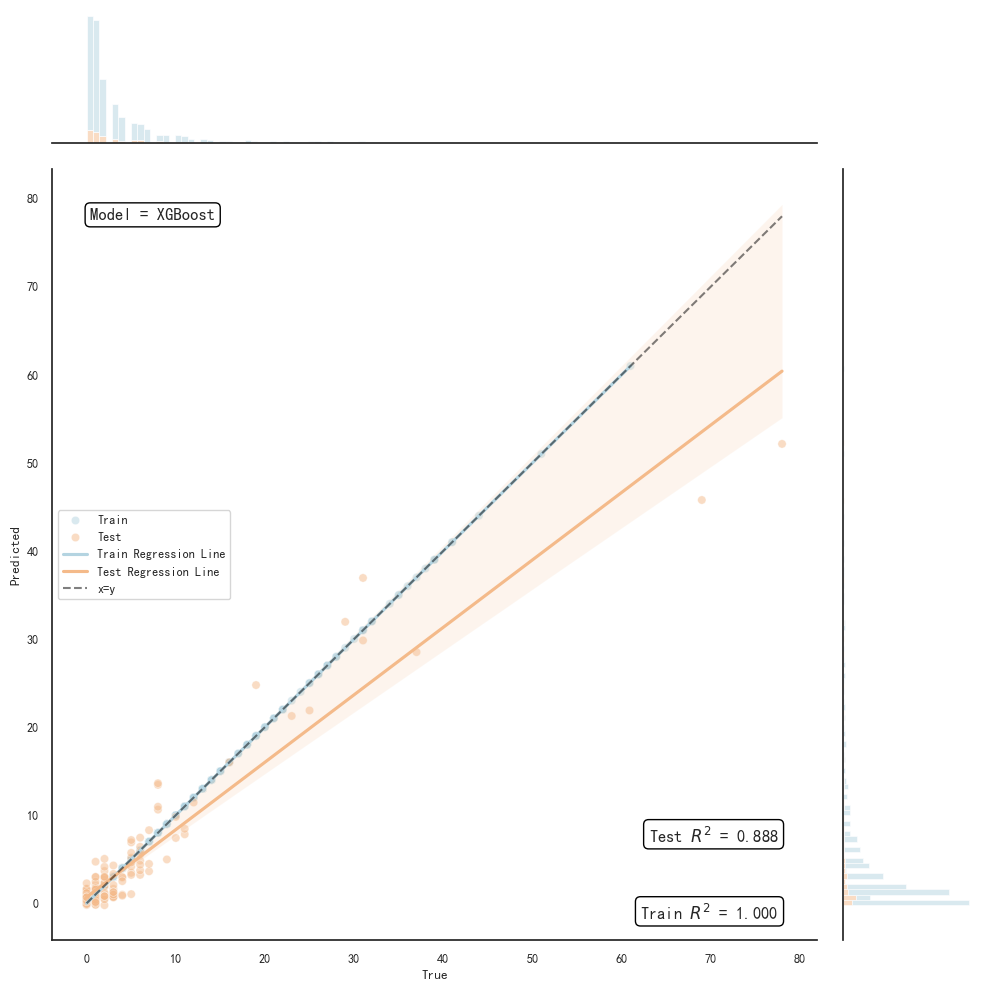

In [412]:

# 模型训练与预测 (假设已定义 X_train, Y_train, X_test, Y_test 和 model)
model.fit(X_train, Y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# 计算 R² 和 MAPE
r2_train = r2_score(Y_train, y_pred_train)
r2_test = r2_score(Y_test, y_pred_test)
mape_train = calculate_mape(Y_train, y_pred_train)
mape_test = calculate_mape(Y_test, y_pred_test)

# 创建包含训练集和测试集真实值与预测值的数据框
data_train = pd.DataFrame({
    'True': Y_train,
    'Predicted': y_pred_train,
    'Data Set': 'Train'
})

data_test = pd.DataFrame({
    'True': Y_test,
    'Predicted': y_pred_test,
    'Data Set': 'Test'
})

data = pd.concat([data_train, data_test])

# 自定义调色板
palette = {'Train': '#b4d4e1', 'Test': '#f4ba8a'}

# 创建 JointGrid 对象
g = sns.JointGrid(data=data, x="True", y="Predicted", hue="Data Set", height=10, palette=palette)

# 绘制中心的散点图
g.plot_joint(sns.scatterplot, alpha=0.5)

# 添加训练集的回归线
sns.regplot(data=data_train, x="True", y="Predicted", scatter=False, ax=g.ax_joint, color='#b4d4e1', label='Train Regression Line')

# 添加测试集的回归线
sns.regplot(data=data_test, x="True", y="Predicted", scatter=False, ax=g.ax_joint, color='#f4ba8a', label='Test Regression Line')

# 添加边缘的柱状图
g.plot_marginals(sns.histplot, kde=False, element='bars', multiple='stack', alpha=0.5)

# 添加拟合优度和 MAPE 文本在右上角
ax = g.ax_joint
ax.text(0.95, 0.05, f'Train $R^2$ = {r2_train:.3f}', transform=ax.transAxes, fontsize=12,
        verticalalignment='top', horizontalalignment='right', bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

ax.text(0.95, 0.15, f'Test $R^2$ = {r2_test:.3f}', transform=ax.transAxes, fontsize=12,
        verticalalignment='top', horizontalalignment='right', bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))


# 在左上角添加模型名称文本
ax.text(0.05, 0.95, 'Model = XGBoost', transform=ax.transAxes, fontsize=12,
        verticalalignment='top', horizontalalignment='left', bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

# 添加中心线 (x=y)
ax.plot([data['True'].min(), data['True'].max()], [data['True'].min(), data['True'].max()], c="black", alpha=0.5, linestyle='--', label='x=y')
ax.legend()

plt.show()


In [163]:
modelSilver = xgb.XGBRegressor(**{'n_estimators': 200, 'max_depth': 10, 'learning_rate': np.float64(0.16315389605177782), 'subsample': np.float64(0.7582764132459205), 'colsample_bytree': np.float64(0.9408421996237794)},random_state=42)

modelSilver.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=np.float64(0.9408421996237794), device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=np.float64(0.16315389605177782), max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [164]:
# 准备数据
y = df['Bronze']  # 奖牌总数['Gold', 'Silver', 'Bronze']
X = df[['NOC']+list(df.columns[6:])]  # 输入特征

# 拆分数据集为训练集和测试集，通常设置 test_size=0.2 或 0.3
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# # XGBoost回归（XGBRegressor）
import xgboost as xgb
model = xgb.XGBRegressor(random_state=42)

# 训练模型
model.fit(X_train, Y_train)
# 预测测试集

y_pred = model.predict(X_test)
# 计算均方误差 (MSE) 和 R² 值
mape= calculate_mape(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

# 输出评估结果
print(f'mape: {mape}')
print(f'R² Score: {r2}')


mape: 2550256173.671165
R² Score: 0.8340592384338379


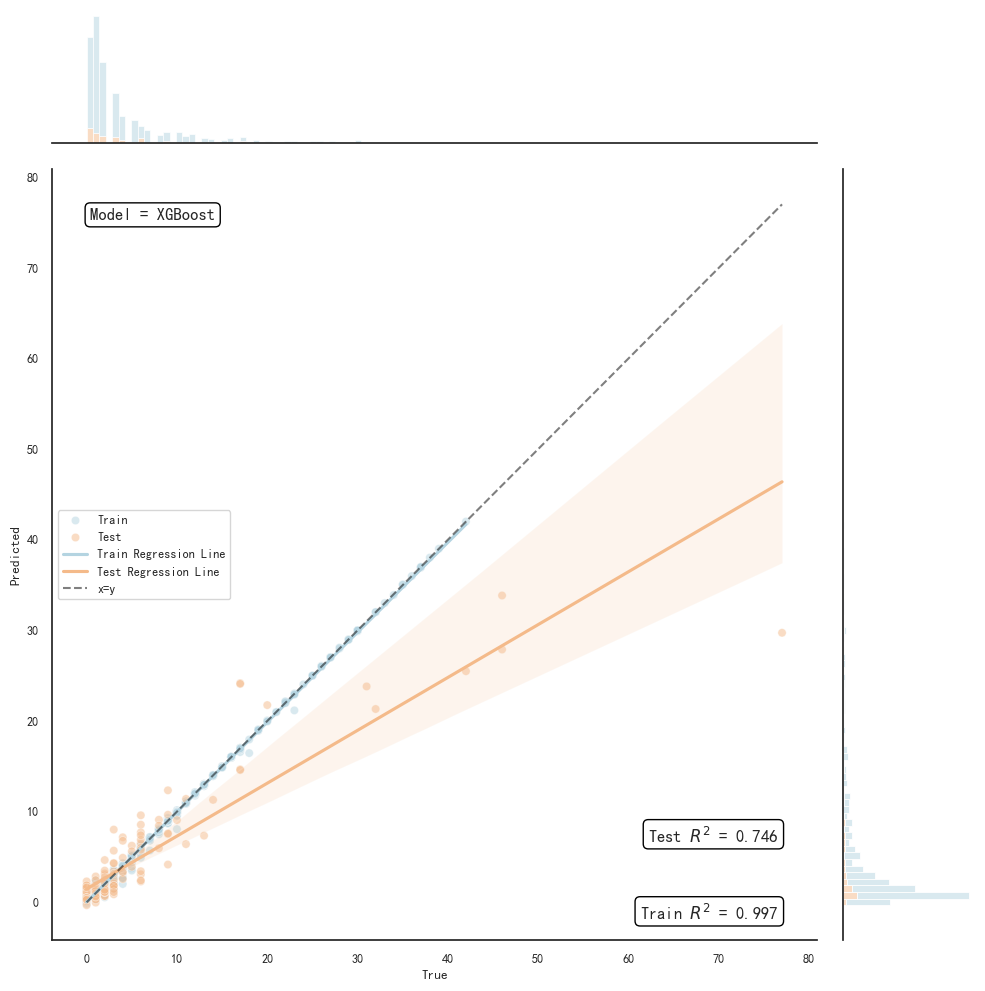

In [415]:

# 模型训练与预测 (假设已定义 X_train, Y_train, X_test, Y_test 和 model)
model.fit(X_train, Y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# 计算 R² 和 MAPE
r2_train = r2_score(Y_train, y_pred_train)
r2_test = r2_score(Y_test, y_pred_test)
mape_train = calculate_mape(Y_train, y_pred_train)
mape_test = calculate_mape(Y_test, y_pred_test)

# 创建包含训练集和测试集真实值与预测值的数据框
data_train = pd.DataFrame({
    'True': Y_train,
    'Predicted': y_pred_train,
    'Data Set': 'Train'
})

data_test = pd.DataFrame({
    'True': Y_test,
    'Predicted': y_pred_test,
    'Data Set': 'Test'
})

data = pd.concat([data_train, data_test])

# 自定义调色板
palette = {'Train': '#b4d4e1', 'Test': '#f4ba8a'}

# 创建 JointGrid 对象
g = sns.JointGrid(data=data, x="True", y="Predicted", hue="Data Set", height=10, palette=palette)

# 绘制中心的散点图
g.plot_joint(sns.scatterplot, alpha=0.5)

# 添加训练集的回归线
sns.regplot(data=data_train, x="True", y="Predicted", scatter=False, ax=g.ax_joint, color='#b4d4e1', label='Train Regression Line')

# 添加测试集的回归线
sns.regplot(data=data_test, x="True", y="Predicted", scatter=False, ax=g.ax_joint, color='#f4ba8a', label='Test Regression Line')

# 添加边缘的柱状图
g.plot_marginals(sns.histplot, kde=False, element='bars', multiple='stack', alpha=0.5)

# 添加拟合优度和 MAPE 文本在右上角
ax = g.ax_joint
ax.text(0.95, 0.05, f'Train $R^2$ = {r2_train:.3f}', transform=ax.transAxes, fontsize=12,
        verticalalignment='top', horizontalalignment='right', bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

ax.text(0.95, 0.15, f'Test $R^2$ = {r2_test:.3f}', transform=ax.transAxes, fontsize=12,
        verticalalignment='top', horizontalalignment='right', bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))


# 在左上角添加模型名称文本
ax.text(0.05, 0.95, 'Model = XGBoost', transform=ax.transAxes, fontsize=12,
        verticalalignment='top', horizontalalignment='left', bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

# 添加中心线 (x=y)
ax.plot([data['True'].min(), data['True'].max()], [data['True'].min(), data['True'].max()], c="black", alpha=0.5, linestyle='--', label='x=y')
ax.legend()

plt.show()


In [416]:

# 定义超参数空间
space = {
    'n_estimators': hp.quniform('n_estimators', 100, 1000, 50),
    'max_depth': hp.quniform('max_depth', 3, 12, 1),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.3),
    'subsample': hp.uniform('subsample', 0.5, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1.0)
}

# 使用TPE优化超参数
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50, trials=trials)

# 最优参数
best_params = {
    'n_estimators': int(best['n_estimators']),
    'max_depth': int(best['max_depth']),
    'learning_rate': best['learning_rate'],
    'subsample': best['subsample'],
    'colsample_bytree': best['colsample_bytree']
}

# 使用最优参数重新训练模型
final_model = xgb.XGBRegressor(**best_params, random_state=42)
final_model.fit(X_train, Y_train)

# 预测并评估最终模型
final_y_pred = final_model.predict(X_test)
final_r2 = r2_score(Y_test, final_y_pred)
final_mape = mean_absolute_percentage_error(Y_test, final_y_pred)

# 输出最终评估结果
print(f"Best Parameters: {best_params}")
print(f"Final R² Score: {final_r2}")
print(f"Final MAPE: {final_mape}")

100%|███████████████████████████████████████████████| 50/50 [01:22<00:00,  1.64s/trial, best loss: -0.8051499128341675]
Best Parameters: {'n_estimators': 850, 'max_depth': 3, 'learning_rate': np.float64(0.0883248471905084), 'subsample': np.float64(0.6907826190504461), 'colsample_bytree': np.float64(0.6029516729921063)}
Final R² Score: 0.8051499128341675
Final MAPE: 914837975946581.5


In [417]:
model = xgb.XGBRegressor(**{'n_estimators': 850, 'max_depth': 3, 'learning_rate': np.float64(0.0883248471905084), 'subsample': np.float64(0.6907826190504461), 'colsample_bytree': np.float64(0.6029516729921063)},random_state=42)

# 训练模型
model.fit(X_train, Y_train)
# 预测测试集

y_pred = model.predict(X_test)
# 计算均方误差 (MSE) 和 R² 值
mape= calculate_mape(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

# 输出评估结果
print(f'mape: {mape}')
print(f'R² Score: {r2}')


mape: 203134836942.40045
R² Score: 0.8051499128341675


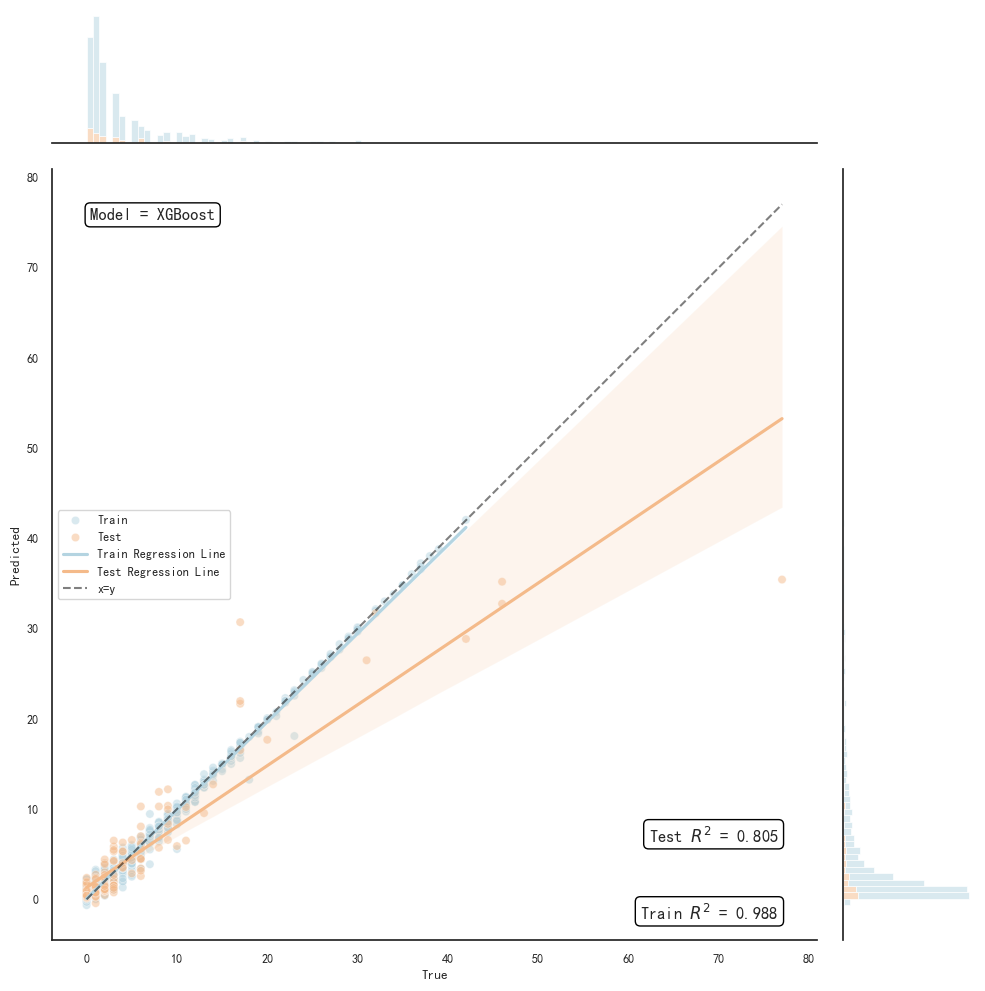

In [418]:

# 模型训练与预测 (假设已定义 X_train, Y_train, X_test, Y_test 和 model)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# 计算 R² 和 MAPE
r2_train = r2_score(Y_train, y_pred_train)
r2_test = r2_score(Y_test, y_pred_test)
mape_train = calculate_mape(Y_train, y_pred_train)
mape_test = calculate_mape(Y_test, y_pred_test)

# 创建包含训练集和测试集真实值与预测值的数据框
data_train = pd.DataFrame({
    'True': Y_train,
    'Predicted': y_pred_train,
    'Data Set': 'Train'
})

data_test = pd.DataFrame({
    'True': Y_test,
    'Predicted': y_pred_test,
    'Data Set': 'Test'
})

data = pd.concat([data_train, data_test])

# 自定义调色板
palette = {'Train': '#b4d4e1', 'Test': '#f4ba8a'}

# 创建 JointGrid 对象
g = sns.JointGrid(data=data, x="True", y="Predicted", hue="Data Set", height=10, palette=palette)

# 绘制中心的散点图
g.plot_joint(sns.scatterplot, alpha=0.5)

# 添加训练集的回归线
sns.regplot(data=data_train, x="True", y="Predicted", scatter=False, ax=g.ax_joint, color='#b4d4e1', label='Train Regression Line')

# 添加测试集的回归线
sns.regplot(data=data_test, x="True", y="Predicted", scatter=False, ax=g.ax_joint, color='#f4ba8a', label='Test Regression Line')

# 添加边缘的柱状图
g.plot_marginals(sns.histplot, kde=False, element='bars', multiple='stack', alpha=0.5)

# 添加拟合优度和 MAPE 文本在右上角
ax = g.ax_joint
ax.text(0.95, 0.05, f'Train $R^2$ = {r2_train:.3f}', transform=ax.transAxes, fontsize=12,
        verticalalignment='top', horizontalalignment='right', bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

ax.text(0.95, 0.15, f'Test $R^2$ = {r2_test:.3f}', transform=ax.transAxes, fontsize=12,
        verticalalignment='top', horizontalalignment='right', bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))


# 在左上角添加模型名称文本
ax.text(0.05, 0.95, 'Model = XGBoost', transform=ax.transAxes, fontsize=12,
        verticalalignment='top', horizontalalignment='left', bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

# 添加中心线 (x=y)
ax.plot([data['True'].min(), data['True'].max()], [data['True'].min(), data['True'].max()], c="black", alpha=0.5, linestyle='--', label='x=y')
ax.legend()

plt.show()


In [166]:
modelBronze =xgb.XGBRegressor(**{'n_estimators': 850, 'max_depth': 3, 'learning_rate': np.float64(0.0883248471905084), 'subsample': np.float64(0.6907826190504461), 'colsample_bytree': np.float64(0.6029516729921063)},random_state=42)

# 训练模型
modelBronze.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=np.float64(0.6029516729921063), device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=np.float64(0.0883248471905084), max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=850, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [422]:
df['NOC']

0       153
1        56
2        53
3        50
4        55
       ... 
1430    113
1431    115
1432    126
1433    127
1434    162
Name: NOC, Length: 1435, dtype: int64

In [167]:
label_encoder.inverse_transform (df['NOC'])

array(['United States', 'Greece', 'Germany', ..., 'Ceylon',
       'FR Yugoslavia', 'ROC'], dtype=object)

In [231]:
newX=X[X['year']==2024].copy()
newX.reset_index(inplace=True,drop=True)

In [232]:
newX['year']=2028

newX['Host_Country']=0

In [233]:
# 筛选出 X['NOC'] == 153 的行
newX.loc[newX['NOC'] == 153, 'Host_Country'] = 1

In [234]:
newdf=newX[['NOC','year']].copy()

In [235]:
newdf['2028Gold']=np.round(model_gold.predict(newX))
newdf['2028Silver']=np.round(modelSilver.predict(newX))
newdf['2028Bronze']=np.round(modelBronze.predict(newX))

In [236]:
newdf['2028Bronze'] = newdf['2028Bronze'].fillna(0).where(newdf['2028Bronze'] >= 0, 0)
newdf['2028Gold'] = newdf['2028Gold'].fillna(0).where(newdf['2028Gold'] >= 0, 0)
newdf['2028Silver'] = newdf['2028Silver'].fillna(0).where(newdf['2028Silver'] >= 0, 0)


In [238]:
# 定义 Sigmoid 激活函数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 对预测值进行回归预测并应用激活函数
newdf['2028Gold_Prob'] = sigmoid(model_gold.predict(newX))
newdf['2028Silver_Prob'] = sigmoid(modelSilver.predict(newX))
newdf['2028Bronze_Prob'] = sigmoid(modelBronze.predict(newX))

In [239]:
newdf['NOC']=label_encoder.inverse_transform (newdf['NOC'])

In [240]:
newdf['2028Total']=newdf['2028Gold']+newdf['2028Silver']+newdf['2028Bronze']

In [241]:
df2024=df[df['year'] == 2024][['NOC', 'Gold', 'Silver', 'Bronze', 'Total']]
df2024.reset_index(inplace=True,drop=True)

In [242]:
df2024.columns

Index(['NOC', 'Gold', 'Silver', 'Bronze', 'Total'], dtype='object')

In [243]:
newdf['2024Gold']=df2024['Gold']
newdf['2024Silver']=df2024['Silver']
newdf['2024Bronze']=df2024['Bronze']
newdf['2024Total']=df2024['Total']

In [244]:
del newX['year']

In [245]:
newdf.to_excel('2028年金牌榜单.xlsx',index=None)

In [246]:
newdf

,NOC,year,2028Gold,2028Silver,2028Bronze,2028Gold_Prob,2028Silver_Prob,2028Bronze_Prob,2028Total,2024Gold,2024Silver,2024Bronze,2024Total
0,United States,2028,40.0,44.0,42.0,1.000000,1.000000,1.000000,126.0,40,44,42,126
1,China,2028,40.0,27.0,24.0,1.000000,1.000000,1.000000,91.0,40,27,24,91
2,Japan,2028,20.0,12.0,13.0,1.000000,0.999994,0.999997,45.0,20,12,13,45
3,Australia,2028,18.0,19.0,17.0,1.000000,1.000000,1.000000,54.0,18,19,16,53
4,France,2028,16.0,26.0,21.0,1.000000,1.000000,1.000000,63.0,16,26,22,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,Mixed team,2028,-0.0,0.0,1.0,0.495362,0.524043,0.702607,1.0,0,0,0,0
100,United Team of Germany,2028,0.0,0.0,5.0,0.501274,0.507235,0.990960,5.0,0,0,0,0
101,Ceylon,2028,0.0,0.0,1.0,0.502620,0.503686,0.626470,1.0,0,0,0,0
102,FR Yugoslavia,2028,-0.0,0.0,1.0,0.499090,0.518478,0.703675,1.0,0,0,0,0


In [247]:

# 添加一列表示2028年成绩是否比2024年高
newdf["Improvement"] = newdf["2028Total"] - newdf["2024Total"]

# 成绩提高的国家
improved_countries = newdf[newdf["Improvement"] > 0][["NOC", "2024Total", "2028Total", "Improvement"]]

# 成绩下降的国家
declined_countries = newdf[newdf["Improvement"] < 0][["NOC", "2024Total", "2028Total", "Improvement"]]





In [248]:
# 按成绩变化降序排列
improved_countries_sorted = improved_countries.sort_values(by="Improvement", ascending=False)
improved_countries_sorted




,NOC,2024Total,2028Total,Improvement
103,ROC,0,6.0,6.0
100,United Team of Germany,0,5.0,5.0
97,Russian Empire,0,2.0,2.0
23,Georgia,7,9.0,2.0
21,Ukraine,12,13.0,1.0
15,Sweden,11,12.0,1.0
10,New Zealand,20,21.0,1.0
3,Australia,53,54.0,1.0
40,Israel,7,8.0,1.0
26,Serbia,5,6.0,1.0


In [249]:
declined_countries_sorted = declined_countries.sort_values(by="Improvement", ascending=True)
declined_countries_sorted

,NOC,2024Total,2028Total,Improvement
7,South Korea,32,26.0,-6.0
63,Turkey,8,4.0,-4.0
68,North Korea,6,2.0,-4.0
50,Greece,8,6.0,-2.0
71,Moldova,4,2.0,-2.0
20,Iran,12,10.0,-2.0
16,Kenya,11,10.0,-1.0
17,Norway,8,7.0,-1.0
27,Czech Republic,5,4.0,-1.0
24,Belgium,10,9.0,-1.0


In [250]:
# 筛选2028年获得奖牌但2024年无奖牌的国家
first_medal_countries = newdf[(newdf["2024Total"] == 0) & (newdf["2028Total"] > 0)]

# 计算这些国家的奖牌数和概率
first_medal_countries_analysis = first_medal_countries[["NOC", "2028Total", "2028Gold_Prob", "2028Silver_Prob", "2028Bronze_Prob"]]

# 估计获得第一枚奖牌的概率（以所有奖牌概率的平均值为代表）
first_medal_probability = first_medal_countries[["2028Gold_Prob", "2028Silver_Prob", "2028Bronze_Prob"]].mean().mean()




In [251]:
first_medal_countries

,NOC,year,2028Gold,2028Silver,2028Bronze,2028Gold_Prob,2028Silver_Prob,2028Bronze_Prob,2028Total,2024Gold,2024Silver,2024Bronze,2024Total,Improvement
91,Independent Olympic Athletes,2028,0.0,-0.0,1.0,0.510740,0.492943,0.698992,1.0,0,0,0,0,1.0
92,Taiwan,2028,0.0,0.0,1.0,0.502869,0.510505,0.767402,1.0,0,0,0,0,1.0
95,Independent Olympic Participants,2028,0.0,0.0,1.0,0.502004,0.505072,0.698992,1.0,0,0,0,0,1.0
97,Russian Empire,2028,2.0,0.0,0.0,0.857350,0.514328,0.358336,2.0,0,0,0,0,2.0
99,Mixed team,2028,-0.0,0.0,1.0,0.495362,0.524043,0.702607,1.0,0,0,0,0,1.0
100,United Team of Germany,2028,0.0,0.0,5.0,0.501274,0.507235,0.990960,5.0,0,0,0,0,5.0
101,Ceylon,2028,0.0,0.0,1.0,0.502620,0.503686,0.626470,1.0,0,0,0,0,1.0
102,FR Yugoslavia,2028,-0.0,0.0,1.0,0.499090,0.518478,0.703675,1.0,0,0,0,0,1.0
103,ROC,2028,0.0,0.0,6.0,0.508119,0.534151,0.998315,6.0,0,0,0,0,6.0


In [252]:
len(first_medal_countries)

9

In [253]:
 first_medal_probability

np.float32(0.5939117)